Drug Property Prediction Mode...
in total: 2601 drugs
encoding drug...
unique drugs: 2601
Done.
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69904. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.95783 , AUPRC: 0.79610 , F1: 0.0
Training at Epoch 2 iteration 0 with loss 0.06365. Total time 0.00083 hours
Validation at Epoch 2 , AUROC: 0.99603 , AUPRC: 0.91287 , F1: 0.66666
Training at Epoch 3 iteration 0 with loss 0.05270. Total time 0.00138 hours
Validation at Epoch 3 , AUROC: 0.99900 , AUPRC: 0.97048 , F1: 0.88888
Training at Epoch 4 iteration 0 with loss 0.02190. Total time 0.00194 hours
Validation at Epoch 4 , AUROC: 0.99900 , AUPRC: 0.97048 , F1: 0.94117
Training at Epoch 5 iteration 0 with loss 0.04127. Total time 0.0025 hours
Validation at Epoch 5 , AUROC: 0.99900 , AUPRC: 0.97048 , F1: 0.88888
Training at Epoch 6 iteration 0 with loss 0.00139. Total time 0.00305 hours
Validation at Epoch 6 , AUROC: 0.99900 , AUPRC: 0.97048 , 

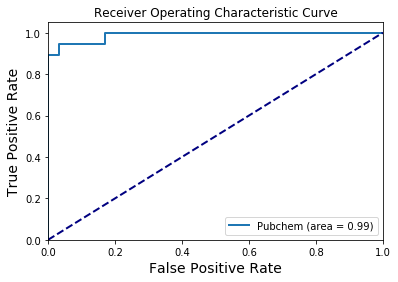

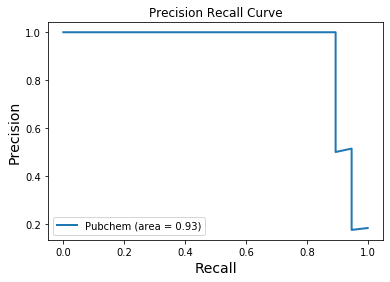

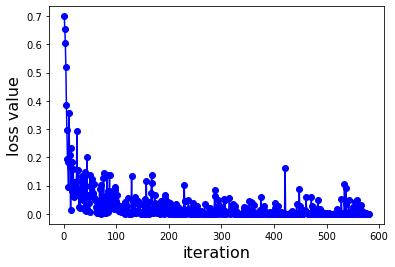

In [6]:
# 注意保存文件
from DeepPurpose import CompoundPred as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
from DeepPurpose import dataset

# load customized bioassy data
X_drugs, _, y = dataset.read_file_training_dataset_bioassay('../my_Data/tastes_split/Umaminess_binary.txt')


# DGL_GIN_AttrMasking CNN_RNN 

# Pubchem CNN DGL_NeuralFP
drug_encoding = 'Pubchem'
train, val, test = data_process(X_drug = X_drugs, y = y, 
			    drug_encoding = drug_encoding,
			    split_method='random', 
			    random_seed = 1)

data_dir = '../my_result/umami/2pubchem/data/'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

train.to_csv(os.path.join(data_dir,'train.csv'))
val.to_csv(os.path.join(data_dir,'val.csv'))
test.to_csv(os.path.join(data_dir,'test.csv'))

config = generate_config(drug_encoding = drug_encoding, 
                         cls_hidden_dims = [512], 
                         train_epoch = 20, 
                         LR = 0.001, 
                         batch_size = 64,
                         rnn_Use_GRU_LSTM_drug='LSTM'
                        )
model = models.model_initialize(**config)
model.train(train, val, test)

# directory 
model.save_model('../my_result/umami/2pubchem/model/')

In [ ]:
# load model
# predict
